In [1]:
import numpy as np
from scipy import stats
import pandas
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima_process import arma_generate_sample, arma_acf

# Simulate data from a MA(1) model

Consider the MA(1) model

$Y_t=0.05+\epsilon_t+\theta\epsilon_{t−1}$,

with $|\theta|<0$ and $\epsilon_t$ $iid$ $N(0,(0.1)^2)$.

In [3]:
ma1_sim = arma_generate_sample(ar=[1], ma=[1, 0.5], nsample=250, sigma =0.1)+0.05

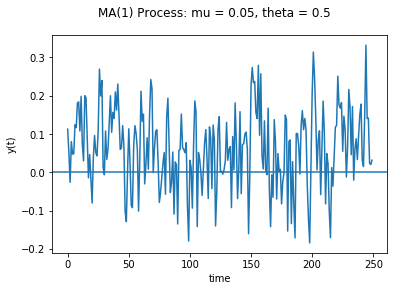

In [4]:
#Plot the data from the simulated MA(1) model
%matplotlib inline
fig = plt.figure()
plt.plot(ma1_sim)
plt.axhline(y=0)
plt.xlabel('time')
plt.ylabel('y(t)')
fig.suptitle("MA(1) Process: mu = 0.05, theta = 0.5")
#plot(ma1_sim, type = "l", main = "MA(1) Process: mu = 0.05, theta = 0.5", xlab = "time", ylab = "y(t)")
#abline(h = 0)

# Plotting the theoretical and the sample ACF
While we still assume $\theta=0.5$, the theoretical value for the first order autocorrelation is $ρ_1=\frac{\theta}{(1+\theta^2)}=\frac{0.5}{(1+0.5^2)}=0.4$. The theoretical autocorrelation function gives you for each lag the autocorrelation implied by the model.

[ 1.   0.4  0.   0.   0.   0.   0.   0.   0.   0.   0. ]
[ 1.          0.39584186  0.05216276  0.0409207   0.02697466  0.05043738
  0.07299402 -0.00493804  0.01061276 -0.03636068 -0.00862579]


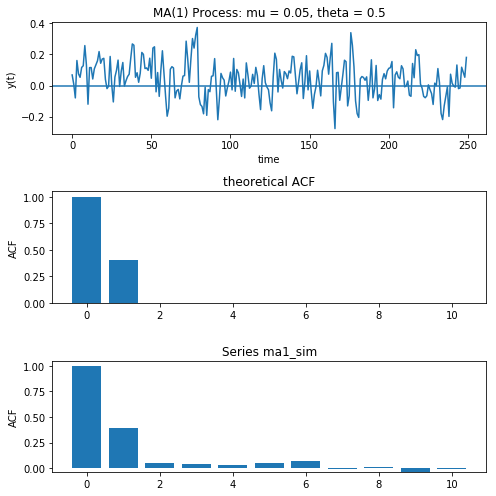

In [15]:
ma1_sim =arma_generate_sample(ar=[1], ma=[1, 0.5], nsample=250, sigma =0.1)+0.05

# Generate the theoretical ACF with upto lag 10
acf_ma1_model = arma_acf([1], [1, 0.5], nobs=11)
print(acf_ma1_model)

# Split plotting window in three rows
#par(mfrow = c(3, 1))
fig, ((ax1, ax2, ax3) ) = plt.subplots(nrows=3, ncols=1, figsize=(7,7))

# First plot: The simulated observations
ax1.plot(ma1_sim)
ax1.axhline(y=0)
ax1.set_xlabel('time')
ax1.set_ylabel('y(t)')
ax1.set_title("MA(1) Process: mu = 0.05, theta = 0.5")

# Second plot: Theoretical ACF
ax2.bar(range(11), acf_ma1_model)
ax2.set_ylabel('ACF')
ax2.set_title("theoretical ACF")

# Third plot: Sample ACF
# Assign to tmp the Sample ACF
tmp = sm.tsa.stattools.acf(ma1_sim, nlags=10)
print(tmp)
ax3.bar(range(11), tmp)
ax3.set_ylabel('ACF')
ax3.set_title("Series ma1_sim")

fig.tight_layout()

# A different MA(1) model

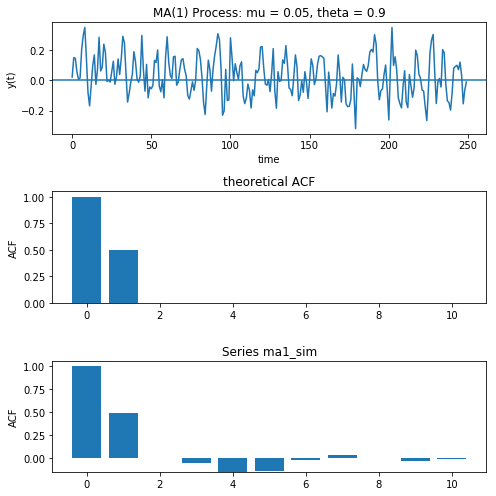

In [17]:
ma1_sim = arma_generate_sample(ar=[1], ma=[1, 0.9], nsample=250, sigma =0.1)+0.05

# Generate the theoretical ACF with upto lag 10
acf_ma1_model = arma_acf([1], [1, 0.9], nobs=11)

# Split plotting window in three rows
#par(mfrow = c(3, 1))
fig, ((ax1, ax2, ax3) ) = plt.subplots(nrows=3, ncols=1, figsize=(7,7))

# First plot: The simulated observations
ax1.plot(ma1_sim)
ax1.axhline(y=0)
ax1.set_xlabel('time')
ax1.set_ylabel('y(t)')
ax1.set_title("MA(1) Process: mu = 0.05, theta = 0.9")

# Second plot: Theoretical ACF
ax2.bar(range(11), acf_ma1_model)
ax2.set_ylabel('ACF')
ax2.set_title("theoretical ACF")

# Third plot: Sample ACF
# Assign to tmp the Sample ACF
tmp = sm.tsa.stattools.acf(ma1_sim, nlags=10)
ax3.bar(range(11), tmp)
ax3.set_ylabel('ACF')
ax3.set_title("Series ma1_sim")

fig.tight_layout()

# An AR(1) model
Now consider the AR(1) model

$Y_t \text{-} 0.05=\phi(Y_{t \text{-} 1} \text{-} 0.05)$

with $|\phi|<0$ and $\epsilon_t$ $iid$ $N(0,(0.1)^2)$

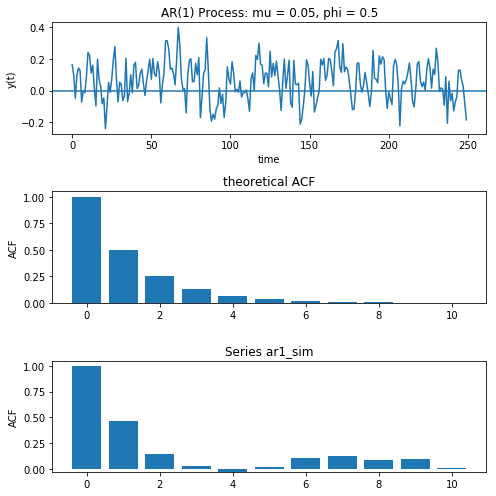

In [18]:
ar1_sim = arma_generate_sample(ar=[1, -0.5], ma=[1], nsample=250, sigma =0.1)+0.05

# Generate the theoretical ACF with upto lag 10
acf_ar1_model = arma_acf([1, -0.5], [1], nobs=11)

# Split plotting window in three rows
#par(mfrow = c(3, 1))
fig, ((ax1, ax2, ax3) ) = plt.subplots(nrows=3, ncols=1, figsize=(7,7))

# First plot: The simulated observations
ax1.plot(ar1_sim)
ax1.axhline(y=0)
ax1.set_xlabel('time')
ax1.set_ylabel('y(t)')
ax1.set_title("AR(1) Process: mu = 0.05, phi = 0.5")

# Second plot: Theoretical ACF
ax2.bar(range(11), acf_ar1_model)
ax2.set_ylabel('ACF')
ax2.set_title("theoretical ACF")

# Third plot: Sample ACF
# Assign to tmp the Sample ACF
tmp = sm.tsa.stattools.acf(ar1_sim, nlags=10)
ax3.bar(range(11), tmp)
ax3.set_ylabel('ACF')
ax3.set_title("Series ar1_sim")

fig.tight_layout()